# Intro

Codes to read and analyze the langley from the C-AIR instrument mounted on 2STAR

# Load required modules

In [1]:
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import map_utils as mu

In [3]:
import Sun_utils as su

In [4]:
from datetime import datetime

In [5]:
fp = 'C:\\Users\\sleblan2\\Research\\4STAR\\MLO_2016\\'

# Test out the dependence on location precision to airmass

## Make a test time series

In [7]:
dt = []
utc_range = [15.5,21.0]
Y = 2016
M = 7
D = 2
for u in np.linspace(utc_range[0],utc_range[1],1000):
    hh = int(u)
    mm = int((u-hh)*60.0)
    ss = int(((u-hh)*60.0-mm)*60.0)
    ms = int((((u-hh)*60.0-mm)*60.0-ss)*1000.0)
    while hh > 23:
        hh = hh-24
        D = D+1
    dt.append(datetime(Y,M,D,hh,mm,ss,ms))

## Set up lat, lon, and alt with different precision

In [29]:
lat = np.array([19.5, 19.54, 19.537, 19.5365, 19.53652, 19.536517, 19.5365167, 19.53651667])

In [30]:
lon = np.array([-155.6,-155.58,-155.576,-155.5762,-155.57615,-155.57615,-155.57615,-155.57615])

In [31]:
alt = np.array([3400, 3450, 3430, 3428, 3428, 3428,3428,3428])

## calcuate the different sza

In [32]:
sza = []
azi = []

In [33]:
for i,la in enumerate(lat):
    aa,ss = [],[]
    for d in dt:
        s,a = mu.get_sza_azi(la,lon[i],d)
        ss.append(s)
        aa.append(a)
    sza.append(ss)
    azi.append(aa)

In [34]:
sza = np.array(sza)
azi = np.array(azi)

## Calculate the airmasses

In [43]:
m_ray, m_aero, m_o3 = [],[],[]

In [44]:
for i,s in enumerate(sza):
    m_r,m_a,_,m_o,_ = su.airmass(s,alt[i])
    m_ray.append(m_r)
    m_aero.append(m_a)
    m_o3.append(m_o)

# Plot the output of this test

<IPython.core.display.Javascript object>


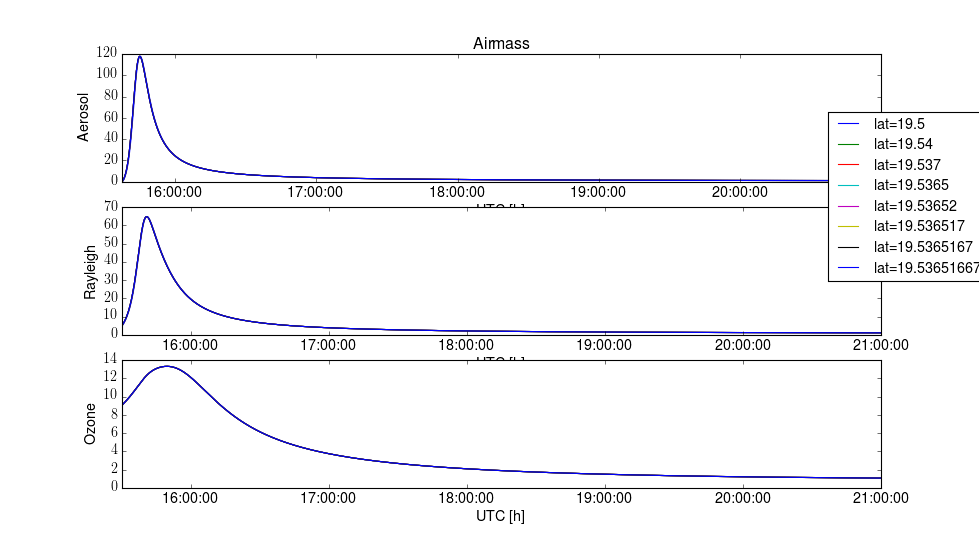

In [63]:
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.set_title('Airmass')
for i,la in enumerate(lat):
    ax.plot(dt,m_aero[i],label='lat={}'.format(la))
#plt.legend(frameon=False)
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Aerosol')
ax = fig.add_subplot(3,1,2)
for i,la in enumerate(lat):
    ax.plot(dt,m_ray[i],label='lat={}'.format(la))
#plt.legend(frameon=False)
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Rayleigh')
ax = fig.add_subplot(3,1,3)
for i,la in enumerate(lat):
    ax.plot(dt,m_o3[i],label='lat={}'.format(la))
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Ozone')
plt.legend(frameon=True,bbox_to_anchor=[1.15,3.0])

<IPython.core.display.Javascript object>


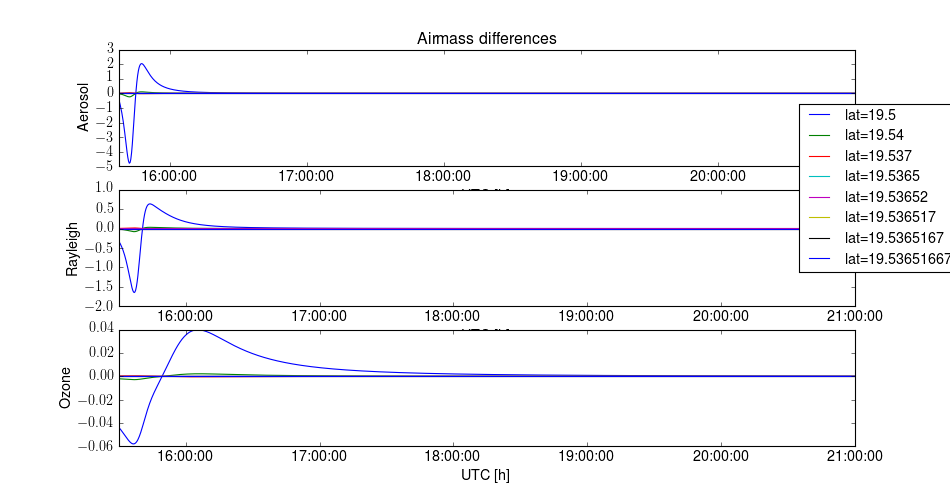

In [64]:
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.set_title('Airmass differences')
for i,la in enumerate(lat):
    ax.plot(dt,m_aero[i]-m_aero[-1],label='lat={}'.format(la))
#plt.legend(frameon=False)
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Aerosol')
ax = fig.add_subplot(3,1,2)
for i,la in enumerate(lat):
    ax.plot(dt,m_ray[i]-m_ray[-1],label='lat={}'.format(la))
#plt.legend(frameon=False)
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Rayleigh')
ax = fig.add_subplot(3,1,3)
for i,la in enumerate(lat):
    ax.plot(dt,m_o3[i]-m_o3[-1],label='lat={}'.format(la))
ax.set_xlabel('UTC [h]')
ax.set_ylabel('Ozone')
plt.legend(frameon=True,bbox_to_anchor=[1.15,3.0])

# Load the C-AIR data file

In [6]:
f = fp+'20160702_MLO5\\CAST_001_160702_090020_URC.csv'

In [7]:
latitude,longitude,altitude = 19.5365,-155.57615,3428.0

In [8]:
from datetime import datetime, timedelta

In [9]:
from load_utils import toutc, recarray_to_dict

In [34]:
c = np.genfromtxt(f,skip_header=0,names=True,delimiter=',')

names = c.dtype.names

co = recarray_to_dict(c)

co['dt'] = []
co['utc'] = np.zeros_like(co['GeneralExcelTime'])
for i,t in enumerate(co['GeneralExcelTime']):
    co['dt'].append(datetime(1899,12,30)+timedelta(days=t)+timedelta(hours=7.))
co['utc'] = toutc(co['dt'])

In [29]:
from dateutil import parser

In [35]:
names

('GeneralExcelTime',
 'DateTime',
 'DateTimeUTC',
 'Millisecond_ms',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm',
 'Lt490_\xb5Wsr_cm\xb2_nm',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt1640_\xb5Wsr_cm\xb2_nm')

In [89]:
n = 'datet'

In [90]:
g = 'Lt320_\xb5Wsr_cm\xb2_nm'

In [102]:
float(g.split('_')[0].strip('Lt'))

320.0

In [101]:
g.strip('Lt')

'320_\xb5Wsr_cm\xb2_nm'

In [88]:
wvl = []
Lt = []
for n in names:
    if n.startswith('Lt'):
        wvl.append(float(n.split('_')[0].strip('Lt')))
        Lt.append(n)

('GeneralExcelTime',
 'DateTime',
 'DateTimeUTC',
 'Millisecond_ms',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm',
 'Lt490_\xb5Wsr_cm\xb2_nm',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt1640_\xb5Wsr_cm\xb2_nm')

In [81]:
def parse_utc(x):
    return parser.parse(x+' UTC')

In [82]:
c1 = np.genfromtxt(f,skip_header=0,dtype='object',names=True,delimiter=',',\
                   converters={'DateTime':parser.parse,'DateTimeUTC':parse_utc})

In [246]:
co['utc']

array([ 16.00568278,  16.00573917,  16.00580861, ...,  26.26507833,
        26.26514778,  26.26521694])

In [10]:
import Cair_utils as cu

In [11]:
reload(cu)

<module 'Cair_utils' from 'Cair_utils.pyc'>

In [12]:
vals = cu.read_Cair(fp+'20160702_MLO5\\CAST_001_160702_090020_URU.csv')

read first
try for second read
trying datetime parse
trying parser
toutc


NameError: global name 'wvl' is not defined

## Calculate the solar position and airmass

In [247]:
co['sza'] = []
co['azi'] = []
co['m_aero'] = []
co['m_ray'] = []
co['m_o3'] = []
for d in co['dt']:
    s,a = mu.get_sza_azi(latitude,longitude,d)
    co['sza'].append(s[0])
    co['azi'].append(a[0]) 
    m_r,m_a,_,m_o,_ = su.airmass(s[0],altitude)
    co['m_aero'].append(m_a)
    co['m_ray'].append(m_r)
    co['m_o3'].append(m_o)

In [184]:
co.keys()

['Lt490_\xb5Wsr_cm\xb2_nm',
 'sza',
 'DateTime',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'm_aero',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'azi',
 'utc',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'DateTimeUTC',
 'Millisecond_ms',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'm_o3',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'GeneralExcelTime',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'dt',
 'Lt1640_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'm_ray',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm']

## Plot a few figures

<IPython.core.display.Javascript object>


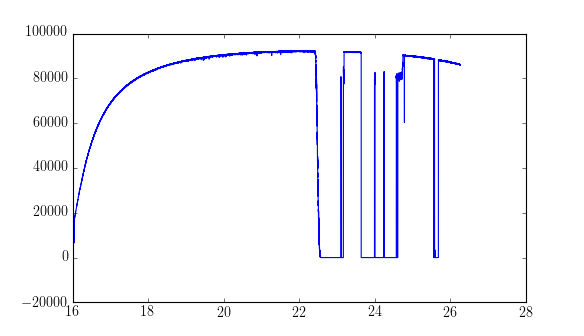

In [248]:
plt.figure()
plt.plot(co['utc'],co['Lt510_\xb5Wsr_cm\xb2_nm'])

<IPython.core.display.Javascript object>


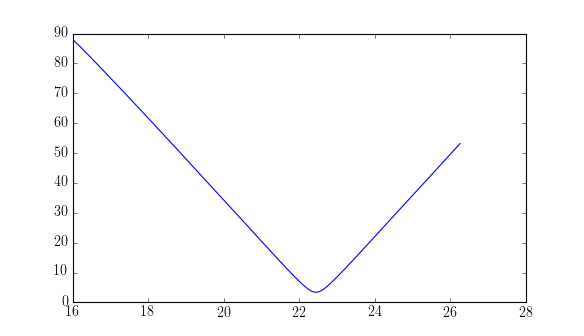

In [249]:
plt.figure()
plt.plot(co['utc'],co['sza'])

<IPython.core.display.Javascript object>


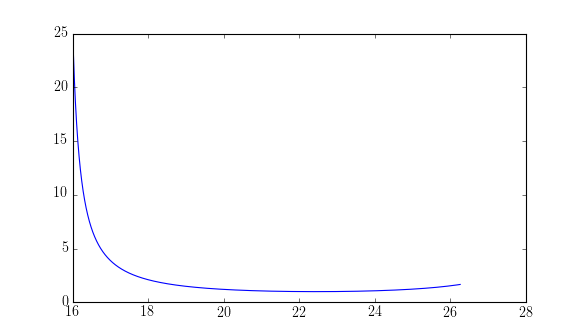

In [250]:
plt.figure()
plt.plot(co['utc'],co['m_aero'])

## Set the interval for langley

In [251]:
fl = np.where((co['utc']>16.0) & (co['utc']<21.0))[0]

In [252]:
fl.shape

(73645L,)

# Plot the resulting Langley plot

<IPython.core.display.Javascript object>


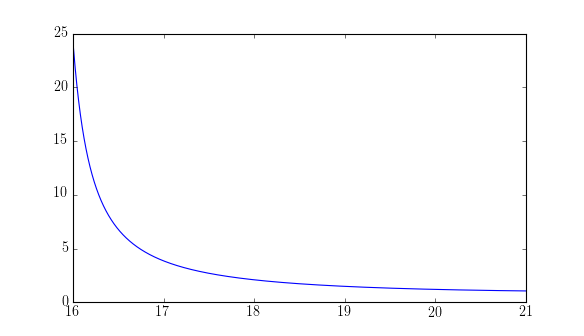

In [253]:
plt.figure()
plt.plot(np.array(co['utc'])[fl],np.array(co['m_aero'])[fl])

<IPython.core.display.Javascript object>


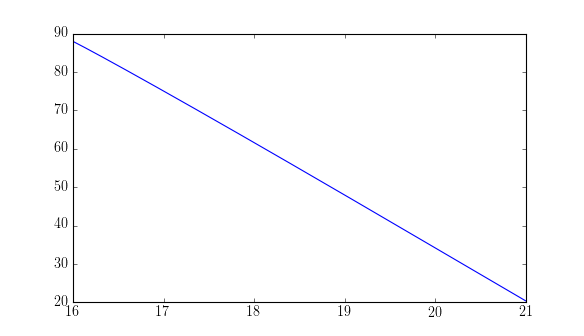

In [254]:
plt.figure()
plt.plot(np.array(co['utc'])[fl],np.array(co['sza'])[fl])

In [260]:
import plotting_utils as pu

In [266]:
fl_mu = (np.array(co['m_aero'])[fl]<13.0)&(np.array(co['m_aero'])[fl]>1.0)

<IPython.core.display.Javascript object>


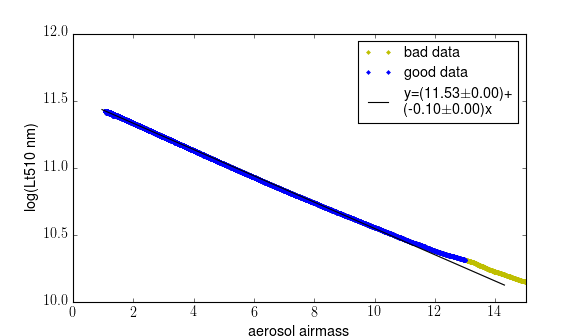

(10, 12)

In [272]:
plt.figure()
plt.plot(np.array(co['m_aero'])[fl],np.log(co['Lt510_\xb5Wsr_cm\xb2_nm'][fl]),'.y',label='bad data')
plt.plot(np.array(co['m_aero'])[fl][fl_mu],np.log(co['Lt510_\xb5Wsr_cm\xb2_nm'][fl][fl_mu]),'.',color='b',label='good data')
pu.plot_lin(np.array(co['m_aero'])[fl][fl_mu],np.log(co['Lt510_\xb5Wsr_cm\xb2_nm'][fl][fl_mu]),color='k',ci=0.99)
plt.legend(frameon=True)
plt.xlabel('aerosol airmass')
plt.ylabel('log(Lt510 nm)')
plt.xlim(0,15)
plt.ylim(10,12)